In [1]:
# Cargando herramientas y librerias
%matplotlib inline
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Cargando archivos de datos...!
datos265 = np.loadtxt('salidatotalMachin3.75d_p1_2.65.out')
datos238 = np.loadtxt('salidatotalMachin3.75d_p1_2.38.out')
datosL = np.loadtxt('distp1_machin.out')
theta = datosL[:,1] # First column (angulo cenital)
phi = datosL[:,0] # Second column (angulo azimutal)
x = datosL[:,2] # Third column (Distancias en roca)
Phi265 = datos265[:,2]/(3.75*2.39)#Flujo en cm^{-2}sr^{-1}day^{-1}, angulo sólido 2.39x10^{-4} de m a cm por 10^4
Phi238 = datos238[:,2]/(3.75*2.39)
print Phi265.max(), Phi265.min(), Phi265.mean(), Phi238.max(), Phi238.min(), x.min(), x.max(), x.mean()

241.785216179 0.0 26.6965970737 241.785216179 0.0 0.0 1315.0 532.808149406


In [3]:
# Los flujos en unidades de cm^(-2) dia^(-1) sr^(-1)
Phi265fit = 3666.9525443332*(x)**(-1.5892191595)#/15.16
Phi238fit = 4102.3166934981*x**(-1.582466591)#/16.96

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


In [4]:
# Enmascarando los datos en los cuales hay cielo (distancias recorridas en roca igual a cero)
m1 = np.ma.masked_where(x==0, x)
Phi265 = np.ma.masked_array(Phi265, m1.mask)
# Además enmascarando los datos con flujo igual a cero
Phi265 = np.ma.masked_where(Phi265==0, Phi265)
Phi238 = np.ma.masked_array(Phi238, m1.mask)
# Además enmascarando los datos con flujo igual a cero
Phi238 = np.ma.masked_where(Phi238==0, Phi238)

# Enmascarando los datos en los cuales hay cielo (distancias recorridas en roca igual a cero)
m = np.ma.masked_where(x==0, x)
Phi265fit = np.ma.masked_array(Phi265fit, m.mask)
# Además enmascarando los datos con flujo igual a cero
Phi265fit = np.ma.masked_where(Phi265fit==0, Phi265fit)
Phi238fit = np.ma.masked_array(Phi238fit, m.mask)
# Además enmascarando los datos con flujo igual a cero
Phi238fit = np.ma.masked_where(Phi238fit==0, Phi238fit)
print Phi265fit.max(), Phi265fit.min(), Phi238fit.max(), Phi238fit.min(), Phi265fit.mean(), Phi265fit.std()

3666.95254433 0.0405180677374 4102.3166935 0.0475809797714 26.102150905 238.136522232


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


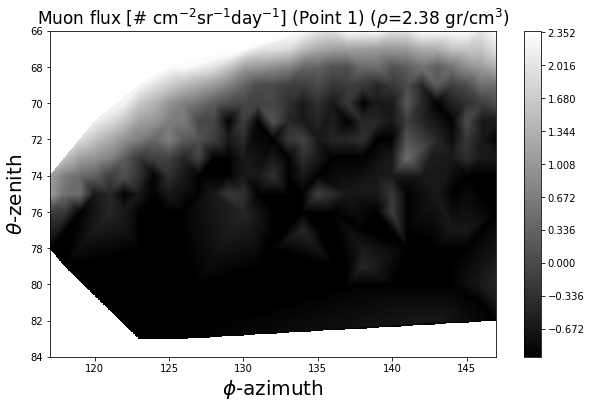

In [5]:
#Define linear spaces
thetai = np.linspace(theta.min(), theta.max(), 500)
phii = np.linspace(phi.min(), phi.max(), 500)
# Interpolates from a nonuniformly spaced grid to some other grid using 
Phii = griddata(phi, theta, np.log10(Phi238), phii, thetai, interp='linear')
# Plots and customization 
plt.figure(figsize=(10,6))
CS = plt.contourf(phii, thetai, Phii, 500, cmap=plt.cm.gray)
plt.colorbar() 
ax = plt.gca() #invertir ejes
ax.invert_yaxis() #invertir ejes
plt.title(r'Muon flux [# cm$^{-2}$sr$^{-1}$day$^{-1}$] (Point 1) ($\rho$=2.38 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
#plt.savefig('flujo238P1a.png', dpi = 300)
plt.show()

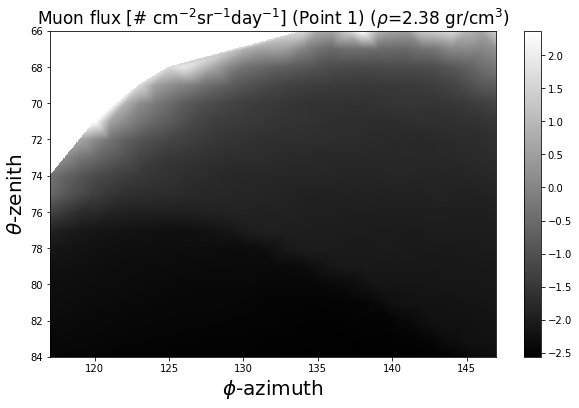

In [6]:
#Define linear spaces
thetai = np.linspace(theta.min(), theta.max(), 500)
phii = np.linspace(phi.min(), phi.max(), 500)
# Interpolates from a nonuniformly spaced grid to some other grid using 
Phii = griddata(phi, theta, np.log10(Phi238fit/16.96), phii, thetai, interp='linear')
# Plots and customization 
plt.figure(figsize=(10,6))
CS = plt.contourf(phii, thetai, Phii, 500, cmap=plt.cm.gray)
plt.colorbar() 
ax = plt.gca() #invertir ejes
ax.invert_yaxis() #invertir ejes
plt.title(r'Muon flux [# cm$^{-2}$sr$^{-1}$day$^{-1}$] (Point 1) ($\rho$=2.38 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('flujo238P1a.png', dpi = 300)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:4386: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = self._data.reshape(*s, **kwargs).view(type(self))
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:4390: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result._mask = mask.reshape(*s, **kwargs)


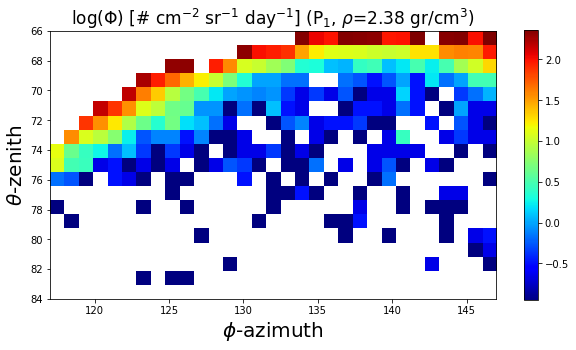

In [7]:
#theta,phi,Phi = np.loadtxt('P1/salidatotal2_65_Machinp1.dat').T #Transposed for easier unpacking
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid = (np.log10(Phi238)).reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='None', cmap=plt.cm.jet)
plt.colorbar(shrink=0.83) 
plt.title(r'$\log(\Phi)$ [# cm$^{-2}$ sr$^{-1}$ day$^{-1}$] (P$_1$, $\rho$=2.38 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('flujo238_375', dpi=300)
plt.show()

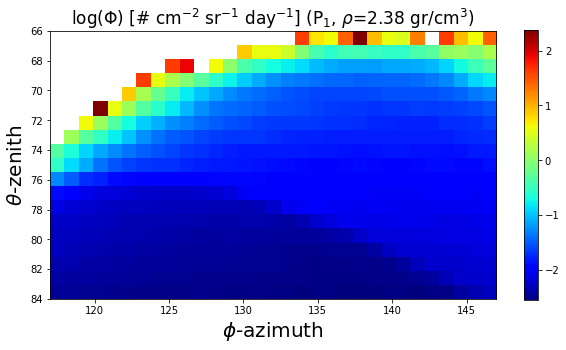

In [8]:
#theta,phi,Phi = np.loadtxt('P1/salidatotal2_65_Machinp1.dat').T #Transposed for easier unpacking
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid = (np.log10(Phi238fit/16.96)).reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='None', cmap=plt.cm.jet)
plt.colorbar(shrink=0.83) 
plt.title(r'$\log(\Phi)$ [# cm$^{-2}$ sr$^{-1}$ day$^{-1}$] (P$_1$, $\rho$=2.38 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('flujo238_375_color', dpi=300)
plt.show()

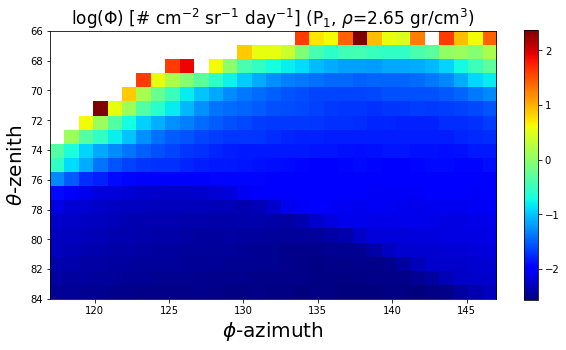

In [9]:
#theta,phi,Phi = np.loadtxt('P1/salidatotal2_65_Machinp1.dat').T #Transposed for easier unpacking
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid = np.log10(Phi265fit/15.16).reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='nearest', cmap=plt.cm.jet)
plt.colorbar(shrink=0.83) 
plt.title(r'$\log(\Phi)$ [# cm$^{-2}$ sr$^{-1}$ day$^{-1}$] (P$_1$, $\rho$=2.65 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('flujo265_375_color', dpi=300)
plt.show()

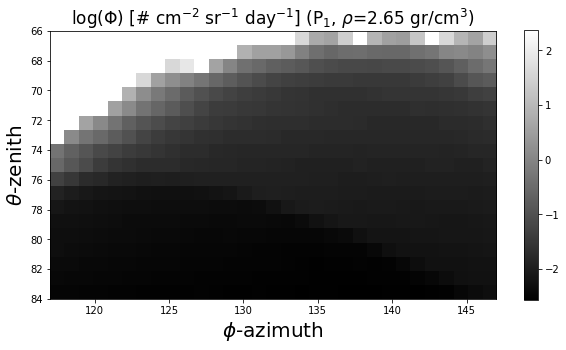

In [10]:
#theta,phi,Phi = np.loadtxt('P1/salidatotal2_65_Machinp1.dat').T #Transposed for easier unpacking
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid = np.log10(Phi265fit/15.16).reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar(shrink=0.83) 
plt.title(r'$\log(\Phi)$ [# cm$^{-2}$ sr$^{-1}$ day$^{-1}$] (P$_1$, $\rho$=2.65 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('flujo265_375_bw', dpi=300)
plt.show()

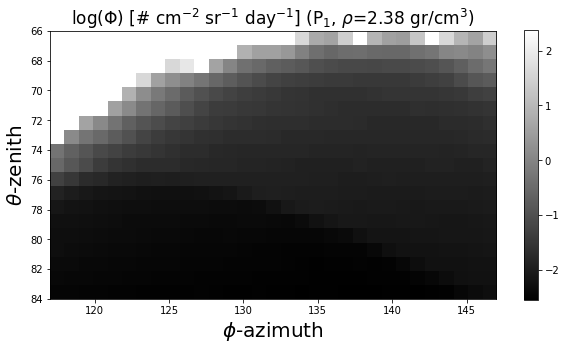

In [11]:
#theta,phi,Phi = np.loadtxt('P1/salidatotal2_65_Machinp1.dat').T #Transposed for easier unpacking
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid = np.log10(Phi238fit/16.96).reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar(shrink=0.83) 
plt.title(r'$\log(\Phi)$ [# cm$^{-2}$ sr$^{-1}$ day$^{-1}$] (P$_1$, $\rho$=2.38 gr/cm$^3$)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('flujo238_375_bw', dpi=300)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


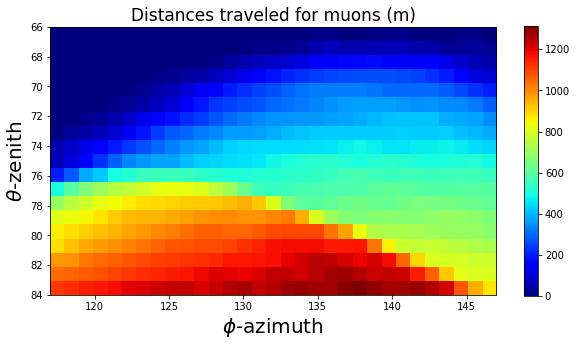

In [12]:
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid_v = x.reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid_v, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='nearest', cmap=plt.cm.jet)
plt.colorbar(shrink=0.83) 
plt.title(r'Distances traveled for muons (m)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('distanciasP1_color.png', dpi = 300)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


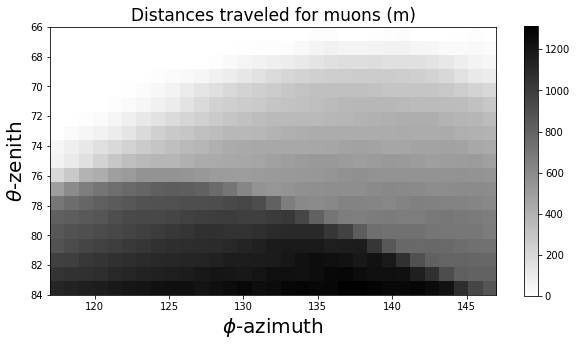

In [13]:
nrows, ncols = theta.max()-theta.min()+1, phi.max()-phi.min()+1
grid_v = x.reshape((nrows, ncols))
plt.figure(figsize=(10,6))
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(grid_v, extent=(phi.min(), phi.max(), theta.max(), theta.min()),
           interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar(shrink=0.83) 
plt.title(r'Distances traveled for muons (m)', linespacing=5, fontsize = 17) 
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-zenith', linespacing=1, fontsize = 20)
plt.savefig('distanciasP1_bn.png', dpi = 300)
plt.show()

In [14]:
data=np.c_[theta,phi,Phi265fit,Phi238fit]#,Phi265,Phi238]
print data

[[  6.60000000e+01   1.17000000e+02              inf              inf]
 [  6.60000000e+01   1.18000000e+02              inf              inf]
 [  6.60000000e+01   1.19000000e+02              inf              inf]
 ..., 
 [  8.40000000e+01   1.45000000e+02   5.56480561e-02   6.52603107e-02]
 [  8.40000000e+01   1.46000000e+02   6.78146854e-02   7.94617297e-02]
 [  8.40000000e+01   1.47000000e+02   7.74122560e-02   9.06566632e-02]]


In [15]:
data=data[data[:,1].argsort()]
theta_graf=data[data[:,1]==134][:,0]#Todos los ángulos cenit pero un ángulo azimuth de 134
E265=data[data[:,1]==134][:,2]
E238=data[data[:,1]==134][:,3]
DE=(E265-E238)**2
frac=E265/DE
t12=frac/4
print frac

[234.87291639122955 724.1466977381119 147.25484433166977 21.058989596963446
 116.96889194960032 690.5694840628714 255.34916892546715 3.64242057936879
 58.77057851782842 0.09681689788323891 501.4853121661611 98.10488624658898
 619.1079366257918 787.3765864239838 164.33002875431 209.65022441685375
 200.29519929103208 94.91839640733453 726.8201373155908]


In [16]:
data2=np.c_[theta_graf,E265,E238,frac]
data2=data2[data2[:,0].argsort()]
print data2

[[  6.60000000e+01   6.39815932e+02   7.21108706e+02   9.68168979e-02]
 [  6.70000000e+01   1.28956361e+01   1.47772319e+01   3.64242058e+00]
 [  6.80000000e+01   1.97438885e+00   2.28058349e+00   2.10589896e+01]
 [  6.90000000e+01   6.60790601e-01   7.66826262e-01   5.87705785e+01]
 [  7.00000000e+01   3.96586946e-01   4.61225854e-01   9.49183964e+01]
 [  7.10000000e+01   3.82889050e-01   4.45361876e-01   9.81048862e+01]
 [  7.20000000e+01   3.17526794e-01   3.69628866e-01   1.16968892e+02]
 [  7.30000000e+01   2.48534828e-01   2.89617515e-01   1.47254844e+02]
 [  7.40000000e+01   2.21160935e-01   2.57846545e-01   1.64330029e+02]
 [  7.50000000e+01   1.79188614e-01   2.09098857e-01   2.00295199e+02]
 [  7.60000000e+01   1.70700305e-01   1.99234753e-01   2.09650224e+02]
 [  7.70000000e+01   1.51282834e-01   1.76662059e-01   2.34872916e+02]
 [  7.80000000e+01   1.38423076e-01   1.61705974e-01   2.55349169e+02]
 [  7.90000000e+01   6.75886503e-02   7.91979969e-02   5.01485312e+02]
 [  8.

In [17]:
A=np.arange(4,13)
print A

[ 4  5  6  7  8  9 10 11 12]


In [18]:
ta66=[data2[0,3]/4,data2[0,3]/5,data2[0,3]/6,data2[0,3]/7,data2[0,3]/8,data2[0,3]/9,data2[0,3]/10,data2[0,3]/11,data2[0,3]/12]
ta67=[data2[1,3]/4,data2[1,3]/5,data2[1,3]/6,data2[1,3]/7,data2[1,3]/8,data2[1,3]/9,data2[1,3]/10,data2[1,3]/11,data2[1,3]/12]
ta68=[data2[2,3]/4,data2[2,3]/5,data2[2,3]/6,data2[2,3]/7,data2[2,3]/8,data2[2,3]/9,data2[2,3]/10,data2[2,3]/11,data2[2,3]/12]
ta69=[data2[3,3]/4,data2[3,3]/5,data2[3,3]/6,data2[3,3]/7,data2[3,3]/8,data2[3,3]/9,data2[3,3]/10,data2[3,3]/11,data2[3,3]/12]
ta70=[data2[4,3]/4,data2[4,3]/5,data2[4,3]/6,data2[4,3]/7,data2[4,3]/8,data2[4,3]/9,data2[4,3]/10,data2[4,3]/11,data2[4,3]/12]
ta71=[data2[5,3]/4,data2[5,3]/5,data2[5,3]/6,data2[5,3]/7,data2[5,3]/8,data2[5,3]/9,data2[5,3]/10,data2[5,3]/11,data2[5,3]/12]
ta72=[data2[6,3]/4,data2[6,3]/5,data2[6,3]/6,data2[6,3]/7,data2[6,3]/8,data2[6,3]/9,data2[6,3]/10,data2[6,3]/11,data2[6,3]/12]
ta73=[data2[7,3]/4,data2[7,3]/5,data2[7,3]/6,data2[7,3]/7,data2[7,3]/8,data2[7,3]/9,data2[7,3]/10,data2[7,3]/11,data2[7,3]/12]
ta74=[data2[8,3]/4,data2[8,3]/5,data2[8,3]/6,data2[8,3]/7,data2[8,3]/8,data2[8,3]/9,data2[8,3]/10,data2[8,3]/11,data2[8,3]/12]
ta75=[data2[9,3]/4,data2[9,3]/5,data2[9,3]/6,data2[9,3]/7,data2[9,3]/8,data2[9,3]/9,data2[9,3]/10,data2[9,3]/11,data2[9,3]/12]
ta76=[data2[10,3]/4,data2[10,3]/5,data2[10,3]/6,data2[10,3]/7,data2[10,3]/8,data2[10,3]/9,data2[10,3]/10,data2[10,3]/11,data2[10,3]/12]
ta77=[data2[11,3]/4,data2[11,3]/5,data2[11,3]/6,data2[11,3]/7,data2[11,3]/8,data2[11,3]/9,data2[11,3]/10,data2[11,3]/11,data2[11,3]/12]
ta78=[data2[12,3]/4,data2[12,3]/5,data2[12,3]/6,data2[12,3]/7,data2[12,3]/8,data2[12,3]/9,data2[12,3]/10,data2[12,3]/11,data2[12,3]/12]
ta79=[data2[13,3]/4,data2[13,3]/5,data2[13,3]/6,data2[13,3]/7,data2[13,3]/8,data2[13,3]/9,data2[13,3]/10,data2[13,3]/11,data2[13,3]/12]
ta80=[data2[14,3]/4,data2[14,3]/5,data2[14,3]/6,data2[14,3]/7,data2[14,3]/8,data2[14,3]/9,data2[14,3]/10,data2[14,3]/11,data2[14,3]/12]
ta81=[data2[15,3]/4,data2[15,3]/5,data2[15,3]/6,data2[15,3]/7,data2[15,3]/8,data2[15,3]/9,data2[15,3]/10,data2[15,3]/11,data2[15,3]/12]
ta82=[data2[16,3]/4,data2[16,3]/5,data2[16,3]/6,data2[16,3]/7,data2[16,3]/8,data2[16,3]/9,data2[16,3]/10,data2[16,3]/11,data2[16,3]/12]
ta83=[data2[17,3]/4,data2[17,3]/5,data2[17,3]/6,data2[17,3]/7,data2[17,3]/8,data2[17,3]/9,data2[17,3]/10,data2[17,3]/11,data2[17,3]/12]
ta84=[data2[18,3]/4,data2[18,3]/5,data2[18,3]/6,data2[18,3]/7,data2[18,3]/8,data2[18,3]/9,data2[18,3]/10,data2[18,3]/11,data2[18,3]/12]
tt4,tt5,tt6,tt7,tt8,tt9,tt10,tt11,tt12=data2[:,3]/4,data2[:,3]/5,data2[:,3]/6,data2[:,3]/7,data2[:,3]/8,data2[:,3]/9,data2[:,3]/10,data2[:,3]/11,data2[:,3]/12
print tt6

[0.016136149647206485 0.6070700965614649 3.5098315994939076
 9.79509641963807 15.819732734555755 16.350814374431497 19.494815324933388
 24.542474055278294 27.388338125718334 33.38253321517201 34.94170406947563
 39.14548606520493 42.55819482091119 83.58088536102686 103.18465610429864
 115.09491401047858 121.13668955259847 120.69111628968533
 131.22943107066396]


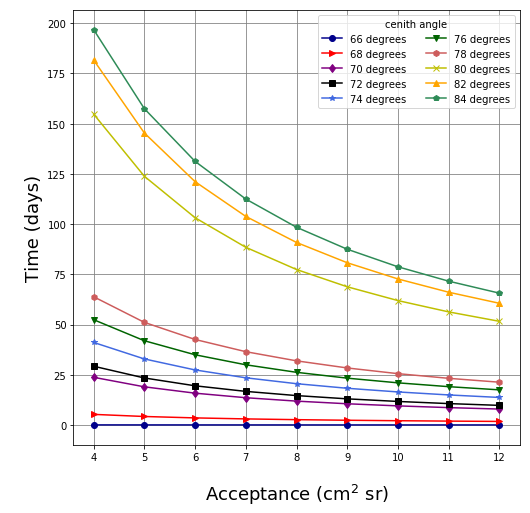

In [27]:
plt.figure(figsize=(8,8))
#plt.title('Muon flux vs thickness on standard rock')
plt.xlabel('\n' + r'Acceptance (cm$^{2}$ sr)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'Time (days)', linespacing=1, fontsize = 18)
plt.plot(A,ta66,linewidth=1.5,drawstyle='default',marker='o',linestyle='solid',color='darkblue',label="66 degrees")
#plt.plot(A,ta67,linewidth=1.5,drawstyle='default',marker='<',linestyle='solid',color='green',label="67 degrees")
plt.plot(A,ta68,linewidth=1.5,drawstyle='default',marker='>',linestyle='solid',color='red',label="68 degrees")
#plt.plot(A,ta69,linewidth=1.5,drawstyle='default',marker='s',linestyle='solid',color='cyan',label="69 degrees")
plt.plot(A,ta70,linewidth=1.5,drawstyle='default',marker='d',linestyle='solid',color='purple',label="70 degrees")
#plt.plot(A,ta71,linewidth=1.5,drawstyle='default',marker='p',linestyle='solid',color='yellow',label="71 degrees")
plt.plot(A,ta72,linewidth=1.5,drawstyle='default',marker='s',linestyle='solid',color='black',label="72 degrees")
#plt.plot(A,ta73,linewidth=1.5,drawstyle='default',marker='x',linestyle='solid',color='orange',label="73 degrees")
plt.plot(A,ta74,linewidth=1.5,drawstyle='default',marker='*',linestyle='solid',color='royalblue',label="74 degrees")
#plt.plot(A,ta75,linewidth=1.5,drawstyle='default',marker='^',linestyle='solid',color='blue',label="75 degrees")
plt.plot(A,ta76,linewidth=1.5,drawstyle='default',marker='v',linestyle='solid',color='darkgreen',label="76 degrees")
#plt.plot(A,ta77,linewidth=1.5,drawstyle='default',marker='+',linestyle='solid',color='red',label="77 degrees")
plt.plot(A,ta78,linewidth=1.5,drawstyle='default',marker='h',linestyle='solid',color='indianred',label="78 degrees")
#plt.plot(A,ta79,linewidth=1.5,drawstyle='default',marker='h',linestyle='solid',color='magenta',label="79 degrees")
plt.plot(A,ta80,linewidth=1.5,drawstyle='default',marker='x',linestyle='solid',color='y',label="80 degrees")
#plt.plot(A,ta81,linewidth=1.5,drawstyle='default',marker='1',linestyle='solid',color='black',label="81 degrees")
plt.plot(A,ta82,linewidth=1.5,drawstyle='default',marker='^',linestyle='solid',color='orange',label="82 degrees")
#plt.plot(A,ta83,linewidth=1.5,drawstyle='default',marker='3',linestyle='solid',color='blue',label="83 degrees")
plt.plot(A,ta84,linewidth=1.5,drawstyle='default',marker='p',linestyle='solid',color='seagreen',label="84 degrees")
plt.legend(loc="upper right",ncol=2, title="cenith angle")
#plt.xlim((3.5,12.5))
#plt.ylim((0,5))
plt.grid(True,which="both",ls="-", color="gray")
#opciones para drawtyle [‘default’ | ‘steps’ | ‘steps-pre’ | ‘steps-mid’ | ‘steps-post’]
plt.savefig('ta_375_color', dpi=300)

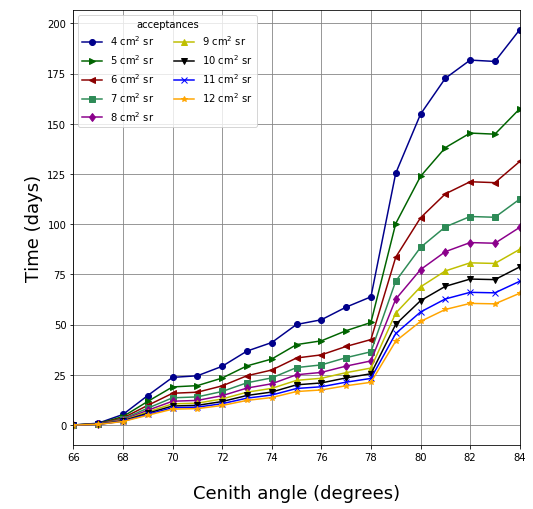

In [29]:
plt.figure(figsize=(8,8))
#plt.title('Muon flux vs thickness on standard rock')
plt.xlabel('\n' + r'Cenith angle (degrees)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'Time (days)', linespacing=1, fontsize = 18)
plt.plot(data2[:,0],tt4,linewidth=1.5,drawstyle='default',marker='o',linestyle='solid',color='darkblue',label="4 cm$^2$ sr")
plt.plot(data2[:,0],tt5,linewidth=1.5,drawstyle='default',marker='>',linestyle='solid',color='darkgreen',label="5 cm$^2$ sr")
plt.plot(data2[:,0],tt6,linewidth=1.5,drawstyle='default',marker='<',linestyle='solid',color='darkred',label="6 cm$^2$ sr")
plt.plot(data2[:,0],tt7,linewidth=1.5,drawstyle='default',marker='s',linestyle='solid',color='seagreen',label="7 cm$^2$ sr")
plt.plot(data2[:,0],tt8,linewidth=1.5,drawstyle='default',marker='d',linestyle='solid',color='darkmagenta',label="8 cm$^2$ sr")
plt.plot(data2[:,0],tt9,linewidth=1.5,drawstyle='default',marker='^',linestyle='solid',color='y',label="9 cm$^2$ sr")
plt.plot(data2[:,0],tt10,linewidth=1.5,drawstyle='default',marker='v',linestyle='solid',color='black',label="10 cm$^2$ sr")
plt.plot(data2[:,0],tt11,linewidth=1.5,drawstyle='default',marker='x',linestyle='solid',color='blue',label="11 cm$^2$ sr")
plt.plot(data2[:,0],tt12,linewidth=1.5,drawstyle='default',marker='*',linestyle='solid',color='orange',label="12 cm$^2$ sr")
plt.legend(loc="upper left",ncol=2, title="acceptances")
plt.xlim((66,84))
#plt.ylim((0,5))
plt.grid(True,which="both",ls="-", color="gray")
#opciones para drawtyle [‘default’ | ‘steps’ | ‘steps-pre’ | ‘steps-mid’ | ‘steps-post’]
plt.savefig('tt_375_color', dpi=300)